<p style = "font-family:georgia,garamond,serif;font-size:16px;font-style:italic;">
Бұл ноутбук хабарландыру тақтасының парсердің өрескел мысалы болып табылады.

_Bul nowtbwk xabarlandırw taqtasınıñ parserdiñ öreskel mısalı bolıp tabıladı._
</p>

In [214]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# page = requests.get('https://www.avito.ru/rossiya/kvartiry/sdam/posutochno/3-komnatnye?p=2')

In [154]:
# file = open("resp_text.txt", "w", encoding='utf-8')
# file.write(page.text)
# file.close()

file = open("resp_text.txt", "r+", encoding='utf-8')
file.read() == page.text
#page_1 = file.write(page.text)

True

In [215]:
page.status_code

200

In [216]:
soup = BeautifulSoup(page.text)

In [217]:
%%time
items = soup.findAll('div', {'class':'item item_table clearfix js-catalog-item-enum item-with-contact js-item-extended'})
vips = soup.findAll('div', {'class':'serp-vips'})

Wall time: 233 ms


In [218]:
prices = []
for item in items:
    #price = int()
    prices.append(item.find('div', {'class':'description item_table-description'}).\
    find('div', {'class':'item_table-header'}).find('span', {'itemprop':'price'})['content'])
               #.findAll('span')[1]

In [219]:
aux_dict_to_format = {'number_of_items' : len(prices),
                      'price' : round(sum(list(map(int, prices))) / len(prices), 3), 
                      'pages': [1, 1]}
print('Average price of pages from #{pages[0]} to #{pages[1]} ({number_of_items} items) is {price} rub'.format_map(aux_dict_to_format))
del aux_dict_to_format

Average price of pages from #1 to #1 (49 items) is 2747.735 rub


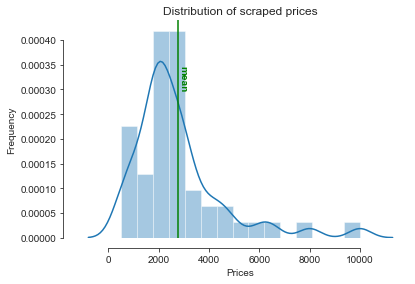

In [220]:
## https://seaborn.pydata.org/tutorial/aesthetics.html
# sns.set_style("dark")
sns.set_style("ticks")
ax = sns.distplot(list(map(int, prices)))
sns.despine(offset=10, trim=True);
ax.set_title('Distribution of scraped prices')
ax.set(xlabel='Prices', 
       ylabel='Frequency')
plt.axvline(x=2747.735, ymin=0, ymax=1., c='green')
plt.text(x=2790, y=0.0003, s='mean', c='green', rotation=-90, weight='bold');
del ax